<a href="https://colab.research.google.com/github/kishorkukreja/SupplyChain_RL/blob/master/SupplyChainCo2Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 40.3 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━

In [1]:
! pip install pyvis kuzu duckdb

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 108.4 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [2]:
# Import libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import pyvis
import random
import itertools
import kuzu
import duckdb

In [3]:
# Create graph model based on Cypher script

# Create a directed graph
G = nx.DiGraph()

# Add nodes with attributes
nodes = [
    ('Dairy Farm A', {'type': 'FARM', 'co2_emission': 5000}),
    ('Cheese Factory A', {'type': 'FACTORY', 'co2_emission': 2000}),
    ('Cheese Distributor B', {'type': 'DISTRIBUTION', 'co2_emission': 380}),
    ('Cheese Factory C', {'type': 'FACTORY', 'co2_emission': 2100}),
    ('Starter Culture Co B', {'type': 'SUPPLIER', 'co2_emission': 250}),
    ('Media Culture B', {'type': 'MEDIA', 'co2_emission': 230}),
    ('Dairy Farm B', {'type': 'FARM', 'co2_emission': 4500}),
    ('Cheese Factory B', {'type': 'FACTORY', 'co2_emission': 1800}),
    ('Cheese Distributor A', {'type': 'DISTRIBUTION', 'co2_emission': 400}),
    ('Final Product Cheese', {'type': 'FINAL_PRODUCT', 'co2_emission': None}),
    ('Dairy Farm C', {'type': 'FARM', 'co2_emission': 5200}),
    ('Salt Supplier B', {'type': 'SUPPLIER', 'co2_emission': 140}),
    ('Media Culture A', {'type': 'MEDIA', 'co2_emission': 250}),
    ('Starter Culture Co A', {'type': 'SUPPLIER', 'co2_emission': 300}),
    ('Salt Supplier A', {'type': 'SUPPLIER', 'co2_emission': 150}),
    ('Salt Supplier C', {'type': 'SUPPLIER', 'co2_emission': 160}),
    ('Packaging Co', {'type': 'SUPPLIER', 'co2_emission': 120}),
]

G.add_nodes_from(nodes)

# Add edges with attributes
edges = [
    ('Dairy Farm A', 'Cheese Factory A', {'co2_emission': 54.38}),
    ('Cheese Factory A', 'Cheese Distributor B', {'co2_emission': 1044.32}),
    ('Cheese Factory C', 'Cheese Distributor B', {'co2_emission': 1212.87}),
    ('Starter Culture Co B', 'Cheese Factory C', {'co2_emission': 3.18}),
    ('Media Culture B', 'Starter Culture Co B', {'co2_emission': 2.47}),
    ('Dairy Farm B', 'Cheese Factory B', {'co2_emission': 53.69}),
    ('Cheese Factory B', 'Cheese Distributor A', {'co2_emission': 1075.97}),
    ('Cheese Distributor A', 'Final Product Cheese', {'co2_emission': 94.75}),
    ('Cheese Distributor B', 'Final Product Cheese', {'co2_emission': 72.87}),
    ('Dairy Farm C', 'Cheese Factory C', {'co2_emission': 58.84}),
    ('Salt Supplier B', 'Cheese Factory C', {'co2_emission': 16.63}),
    ('Media Culture A', 'Starter Culture Co A', {'co2_emission': 2.71}),
    ('Starter Culture Co A', 'Cheese Factory B', {'co2_emission': 3.69}),
    ('Salt Supplier A', 'Cheese Factory B', {'co2_emission': 11.09}),
    ('Starter Culture Co B', 'Cheese Factory A', {'co2_emission': 2.15}),
    ('Salt Supplier C', 'Cheese Factory A', {'co2_emission': 15.21}),
    ('Packaging Co', 'Cheese Factory B', {'co2_emission': 4.99}),
    ('Packaging Co', 'Cheese Factory A', {'co2_emission': 4.9}),
    ('Packaging Co', 'Cheese Factory C', {'co2_emission': 4.78}),
]

G.add_edges_from(edges)

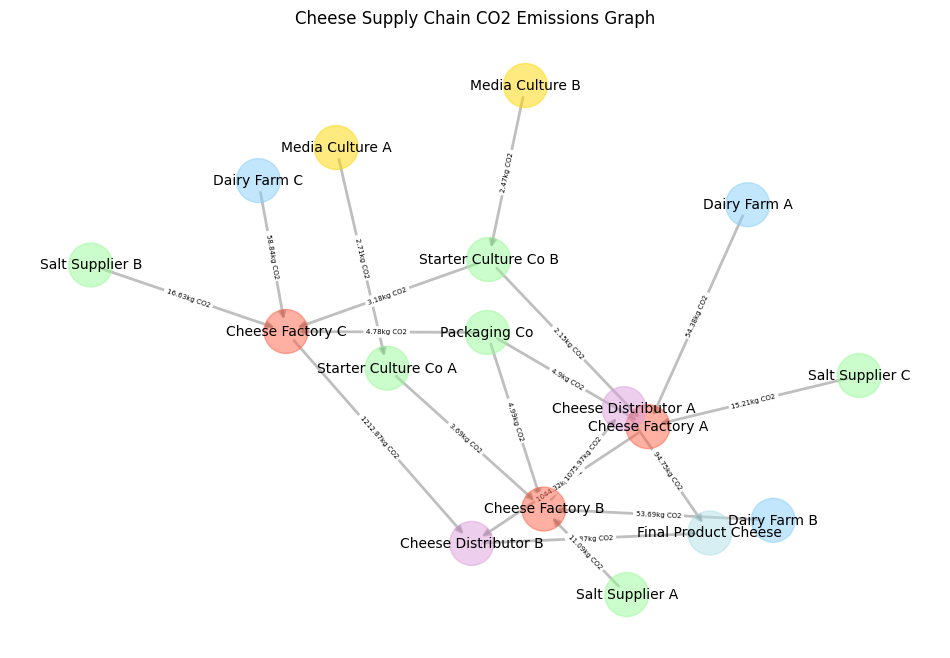

In [4]:
# Visualize the graph model

# Update node colors
node_colors = ["#87CEFA" if G.nodes[node]['type'] == "FARM" else
               "#FF6347" if G.nodes[node]['type'] == "FACTORY" else
               "#98FB98" if G.nodes[node]['type'] == "SUPPLIER" else
               "#FFD700" if G.nodes[node]['type'] == "MEDIA" else
               "#DDA0DD" if G.nodes[node]['type'] == "DISTRIBUTION" else
               "#B0E0E6" if G.nodes[node]['type'] == "FINAL_PRODUCT" else "#FFFFFF" for node in G.nodes]

# Visualize the graph with labels
pos = nx.spring_layout(G, seed=42, k=0.5)  # Position nodes
plt.figure(figsize=(12, 8))

# Draw nodes with labels and colors
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000, alpha=0.5)

# Draw the edges with labels for CO2 emissions
nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, alpha=0.5, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10)

# Edge labels for CO2 emissions
edge_labels = {(u, v): f"{round(d['co2_emission'], 2)}kg CO2" if d['co2_emission'] is not None else "No CO2 data"
               for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5)

plt.title("Cheese Supply Chain CO2 Emissions Graph")
plt.axis("off")
plt.show()


# Embedded Graph Database using Kuzu

In [5]:
# Create an embedded graph database using Kuzú

# Initialize the database
db = kuzu.Database("./co2emissions.db")
conn = kuzu.Connection(db)

In [6]:
# Create schema
conn.execute("CREATE NODE TABLE Farm(name STRING, co2_emission FLOAT, PRIMARY KEY (name))")
conn.execute("CREATE NODE TABLE Factory(name STRING, co2_emission FLOAT, PRIMARY KEY (name))")
conn.execute("CREATE NODE TABLE Supplier(name STRING, co2_emission FLOAT, PRIMARY KEY (name))")
conn.execute("CREATE NODE TABLE Media(name STRING, co2_emission FLOAT, PRIMARY KEY (name))")
conn.execute("CREATE NODE TABLE Distributor(name STRING, co2_emission FLOAT, PRIMARY KEY (name))")
conn.execute("CREATE NODE TABLE FinalProduct(name STRING, co2_emission FLOAT, PRIMARY KEY (name))")

conn.execute("CREATE REL TABLE Supplies_Farm_To_Factory(FROM Farm TO Factory, co2_emission FLOAT)")
conn.execute("CREATE REL TABLE Supplies_Supplier_To_Factory(FROM Supplier TO Factory, co2_emission FLOAT)")
conn.execute("CREATE REL TABLE Supplies_Media_To_Supplier(FROM Media TO Supplier, co2_emission FLOAT)")
conn.execute("CREATE REL TABLE Supplies_Factory_To_Distributor(FROM Factory TO Distributor, co2_emission FLOAT)")
conn.execute("CREATE REL TABLE Delivers(FROM Distributor TO FinalProduct, co2_emission FLOAT)")

# Populate nodes
farms = [
    ("Dairy Farm A", 5000),
    ("Dairy Farm B", 4500),
    ("Dairy Farm C", 5200)
]

factories = [
    ("Cheese Factory A", 2000),
    ("Cheese Factory B", 1800),
    ("Cheese Factory C", 2100)
]

suppliers = [
    ("Starter Culture Co A", 300),
    ("Starter Culture Co B", 250),
    ("Salt Supplier A", 150),
    ("Salt Supplier B", 140),
    ("Salt Supplier C", 160),
    ("Packaging Co", 120)
]

media = [
    ("Media Culture A", 250),
    ("Media Culture B", 230)
]

distributors = [
    ("Cheese Distributor A", 400),
    ("Cheese Distributor B", 380)
]

final_products = [
    ("Cheese", None)
]

for farm in farms:
    conn.execute(f"CREATE (n:Farm {{name: '{farm[0]}', co2_emission: {farm[1]}}})")

for factory in factories:
    conn.execute(f"CREATE (n:Factory {{name: '{factory[0]}', co2_emission: {factory[1]}}})")

for supplier in suppliers:
    conn.execute(f"CREATE (n:Supplier {{name: '{supplier[0]}', co2_emission: {supplier[1]}}})")

for medium in media:
    conn.execute(f"CREATE (n:Media {{name: '{medium[0]}', co2_emission: {medium[1]}}})")

for distributor in distributors:
    conn.execute(f"CREATE (n:Distributor {{name: '{distributor[0]}', co2_emission: {distributor[1]}}})")

for final_product in final_products:
    co2_emission_value = "NULL" if final_product[1] is None else final_product[1]
    conn.execute(f"CREATE (n:FinalProduct {{name: '{final_product[0]}', co2_emission: {co2_emission_value}}})")

# Populate edges
farm_factory_rels = [
    ("Dairy Farm A", "Cheese Factory A", 54.38),
    ("Dairy Farm B", "Cheese Factory B", 53.69),
    ("Dairy Farm C", "Cheese Factory C", 58.84)
]

supplier_factory_rels = [
    ("Starter Culture Co A", "Cheese Factory B", 3.69),
    ("Starter Culture Co B", "Cheese Factory A", 2.15),
    ("Starter Culture Co B", "Cheese Factory C", 3.18),
    ("Salt Supplier A", "Cheese Factory B", 11.09),
    ("Salt Supplier B", "Cheese Factory C", 16.63),
    ("Salt Supplier C", "Cheese Factory A", 15.21),
    ("Packaging Co", "Cheese Factory A", 4.90),
    ("Packaging Co", "Cheese Factory B", 4.99),
    ("Packaging Co", "Cheese Factory C", 4.78)
]

media_supplier_rels = [
    ("Media Culture A", "Starter Culture Co A", 2.71),
    ("Media Culture B", "Starter Culture Co B", 2.47)
]

factory_distributor_rels = [
    ("Cheese Factory A", "Cheese Distributor B", 1044.32),
    ("Cheese Factory B", "Cheese Distributor A", 1075.97),
    ("Cheese Factory C", "Cheese Distributor B", 1212.87)
]

distributor_final_product_rels = [
    ("Cheese Distributor A", "Cheese", 94.75),
    ("Cheese Distributor B", "Cheese", 72.87)
]

for rel in farm_factory_rels:
    conn.execute(f"MATCH (a:Farm {{name: '{rel[0]}'}}), (b:Factory {{name: '{rel[1]}'}}) CREATE (a)-[:Supplies_Farm_To_Factory {{co2_emission: {rel[2]}}}]->(b)")

for rel in supplier_factory_rels:
    conn.execute(f"MATCH (a:Supplier {{name: '{rel[0]}'}}), (b:Factory {{name: '{rel[1]}'}}) CREATE (a)-[:Supplies_Supplier_To_Factory {{co2_emission: {rel[2]}}}]->(b)")

for rel in media_supplier_rels:
    conn.execute(f"MATCH (a:Media {{name: '{rel[0]}'}}), (b:Supplier {{name: '{rel[1]}'}}) CREATE (a)-[:Supplies_Media_To_Supplier {{co2_emission: {rel[2]}}}]->(b)")

for rel in factory_distributor_rels:
    conn.execute(f"MATCH (a:Factory {{name: '{rel[0]}'}}), (b:Distributor {{name: '{rel[1]}'}}) CREATE (a)-[:Supplies_Factory_To_Distributor {{co2_emission: {rel[2]}}}]->(b)")

for rel in distributor_final_product_rels:
    conn.execute(f"MATCH (a:Distributor {{name: '{rel[0]}'}}), (b:FinalProduct {{name: '{rel[1]}'}}) CREATE (a)-[:Delivers {{co2_emission: {rel[2]}}}]->(b)")

## Find the factory that will lead to the path with the least CO2 emissions

In [7]:
# Find the factory that will lead to the path with the least CO2 emissions
response = conn.execute(
    """
// Step 1: Calculate the cumulative CO2 emissions for each factory, including inbound paths
MATCH (f:Factory)
OPTIONAL MATCH p=(inbound)-[*]->(f)
WITH f,
     COLLECT(p) AS paths
UNWIND paths AS path
UNWIND NODES(path) AS n
UNWIND RELS(path) AS r
WITH f,
     SUM(DISTINCT COALESCE(n.co2_emission, 0)) + SUM(DISTINCT r.co2_emission) AS inbound_co2_emission
WITH f, inbound_co2_emission

// Step 2: Calculate the total CO2 emissions for the paths from each factory to the final product
MATCH path = (f)-[*]->(c:FinalProduct {name: 'Cheese'})
UNWIND NODES(path) AS n
UNWIND RELS(path) AS r
WITH f, inbound_co2_emission,
     SUM(DISTINCT COALESCE(n.co2_emission, 0)) + SUM(DISTINCT r.co2_emission) AS path_co2_emission
WITH f, inbound_co2_emission + path_co2_emission  - f.co2_emission AS total_path_co2
RETURN f.name, total_path_co2
ORDER BY total_path_co2 ASC
    """
)
response.get_as_df()

,f.name,total_path_co2
0,Cheese Factory B,8766.889648
1,Cheese Factory A,9336.299805
2,Cheese Factory C,9791.639648


## Adding Sustainability Index, Lead time & Distance

In [9]:
# Create an embedded graph database using Kuzú

# Initialize the database
db = kuzu.Database("./co2emissions_updated.db")
conn = kuzu.Connection(db)

In [10]:
# Add new fields to the node tables for sustainability index
conn.execute("CREATE NODE TABLE Farm(name STRING, co2_emission FLOAT, sustainability_index FLOAT, PRIMARY KEY (name))")
conn.execute("CREATE NODE TABLE Factory(name STRING, co2_emission FLOAT, sustainability_index FLOAT, PRIMARY KEY (name))")
conn.execute("CREATE NODE TABLE Supplier(name STRING, co2_emission FLOAT, sustainability_index FLOAT, PRIMARY KEY (name))")
conn.execute("CREATE NODE TABLE Media(name STRING, co2_emission FLOAT, sustainability_index FLOAT, PRIMARY KEY (name))")
conn.execute("CREATE NODE TABLE Distributor(name STRING, co2_emission FLOAT, sustainability_index FLOAT, PRIMARY KEY (name))")
conn.execute("CREATE NODE TABLE FinalProduct(name STRING, co2_emission FLOAT, sustainability_index FLOAT, PRIMARY KEY (name))")

# Add new fields to the relationship tables for distance and lead time
conn.execute("CREATE REL TABLE Supplies_Farm_To_Factory(FROM Farm TO Factory, co2_emission FLOAT, distance FLOAT, lead_time FLOAT)")
conn.execute("CREATE REL TABLE Supplies_Supplier_To_Factory(FROM Supplier TO Factory, co2_emission FLOAT, distance FLOAT, lead_time FLOAT)")
conn.execute("CREATE REL TABLE Supplies_Media_To_Supplier(FROM Media TO Supplier, co2_emission FLOAT, distance FLOAT, lead_time FLOAT)")
conn.execute("CREATE REL TABLE Supplies_Factory_To_Distributor(FROM Factory TO Distributor, co2_emission FLOAT, distance FLOAT, lead_time FLOAT)")
conn.execute("CREATE REL TABLE Delivers(FROM Distributor TO FinalProduct, co2_emission FLOAT, distance FLOAT, lead_time FLOAT)")

In [11]:
farms = [
    ("Dairy Farm A", 5000, 0.8),
    ("Dairy Farm B", 4500, 0.7),
    ("Dairy Farm C", 5200, 0.75)
]

factories = [
    ("Cheese Factory A", 2000, 0.6),
    ("Cheese Factory B", 1800, 0.65),
    ("Cheese Factory C", 2100, 0.55)
]

suppliers = [
    ("Starter Culture Co A", 300, 0.85),
    ("Starter Culture Co B", 250, 0.80),
    ("Salt Supplier A", 150, 0.90),
    ("Salt Supplier B", 140, 0.88),
    ("Salt Supplier C", 160, 0.87),
    ("Packaging Co", 120, 0.95)
]

media = [
    ("Media Culture A", 250, 0.9),
    ("Media Culture B", 230, 0.85)
]

distributors = [
    ("Cheese Distributor A", 400, 0.7),
    ("Cheese Distributor B", 380, 0.72)
]

final_products = [
    ("Cheese", None, 0.6)
]

for farm in farms:
    conn.execute(f"CREATE (n:Farm {{name: '{farm[0]}', co2_emission: {farm[1]}, sustainability_index: {farm[2]}}})")

for factory in factories:
    conn.execute(f"CREATE (n:Factory {{name: '{factory[0]}', co2_emission: {factory[1]}, sustainability_index: {factory[2]}}})")

for supplier in suppliers:
    conn.execute(f"CREATE (n:Supplier {{name: '{supplier[0]}', co2_emission: {supplier[1]}, sustainability_index: {supplier[2]}}})")

for medium in media:
    conn.execute(f"CREATE (n:Media {{name: '{medium[0]}', co2_emission: {medium[1]}, sustainability_index: {medium[2]}}})")

for distributor in distributors:
    conn.execute(f"CREATE (n:Distributor {{name: '{distributor[0]}', co2_emission: {distributor[1]}, sustainability_index: {distributor[2]}}})")

for final_product in final_products:
    co2_emission_value = "NULL" if final_product[1] is None else final_product[1]
    conn.execute(f"CREATE (n:FinalProduct {{name: '{final_product[0]}', co2_emission: {co2_emission_value}, sustainability_index: {final_product[2]}}})")

In [12]:
farm_factory_rels = [
    ("Dairy Farm A", "Cheese Factory A", 54.38, 120.0, 3),
    ("Dairy Farm B", "Cheese Factory B", 53.69, 140.5, 4),
    ("Dairy Farm C", "Cheese Factory C", 58.84, 110.3, 5)
]

supplier_factory_rels = [
    ("Starter Culture Co A", "Cheese Factory B", 3.69, 90.2, 1),
    ("Starter Culture Co B", "Cheese Factory A", 2.15, 95.4, 2),
    ("Starter Culture Co B", "Cheese Factory C", 3.18, 105.6, 3),
    ("Salt Supplier A", "Cheese Factory B", 11.09, 130.1, 4),
    ("Salt Supplier B", "Cheese Factory C", 16.63, 150.9, 5),
    ("Salt Supplier C", "Cheese Factory A", 15.21, 110.7, 3),
    ("Packaging Co", "Cheese Factory A", 4.90, 120.3, 2),
    ("Packaging Co", "Cheese Factory B", 4.99, 115.0, 3),
    ("Packaging Co", "Cheese Factory C", 4.78, 140.5, 4)
]

media_supplier_rels = [
    ("Media Culture A", "Starter Culture Co A", 2.71, 90.5, 1),
    ("Media Culture B", "Starter Culture Co B", 2.47, 95.3, 2)
]

factory_distributor_rels = [
    ("Cheese Factory A", "Cheese Distributor B", 1044.32, 300.8, 7),
    ("Cheese Factory B", "Cheese Distributor A", 1075.97, 310.2, 8),
    ("Cheese Factory C", "Cheese Distributor B", 1212.87, 325.4, 9)
]

distributor_final_product_rels = [
    ("Cheese Distributor A", "Cheese", 94.75, 400.2, 6),
    ("Cheese Distributor B", "Cheese", 72.87, 450.3, 5)
]

for rel in farm_factory_rels:
    conn.execute(f"MATCH (a:Farm {{name: '{rel[0]}'}}), (b:Factory {{name: '{rel[1]}'}}) CREATE (a)-[:Supplies_Farm_To_Factory {{co2_emission: {rel[2]}, distance: {rel[3]}, lead_time: {rel[4]}}}]->(b)")

for rel in supplier_factory_rels:
    conn.execute(f"MATCH (a:Supplier {{name: '{rel[0]}'}}), (b:Factory {{name: '{rel[1]}'}}) CREATE (a)-[:Supplies_Supplier_To_Factory {{co2_emission: {rel[2]}, distance: {rel[3]}, lead_time: {rel[4]}}}]->(b)")

for rel in media_supplier_rels:
    conn.execute(f"MATCH (a:Media {{name: '{rel[0]}'}}), (b:Supplier {{name: '{rel[1]}'}}) CREATE (a)-[:Supplies_Media_To_Supplier {{co2_emission: {rel[2]}, distance: {rel[3]}, lead_time: {rel[4]}}}]->(b)")

for rel in factory_distributor_rels:
    conn.execute(f"MATCH (a:Factory {{name: '{rel[0]}'}}), (b:Distributor {{name: '{rel[1]}'}}) CREATE (a)-[:Supplies_Factory_To_Distributor {{co2_emission: {rel[2]}, distance: {rel[3]}, lead_time: {rel[4]}}}]->(b)")

for rel in distributor_final_product_rels:
    conn.execute(f"MATCH (a:Distributor {{name: '{rel[0]}'}}), (b:FinalProduct {{name: '{rel[1]}'}}) CREATE (a)-[:Delivers {{co2_emission: {rel[2]}, distance: {rel[3]}, lead_time: {rel[4]}}}]->(b)")

## Find the Factory with the Shortest Lead Time to Deliver the Final Product

In [13]:
response = conn.execute(
    """
    // Step 1: Calculate the cumulative lead time for each factory, including inbound paths
    MATCH (f:Factory)
    OPTIONAL MATCH p=(inbound)-[*]->(f)
    WITH f,
         COLLECT(p) AS paths
    UNWIND paths AS path
    UNWIND RELS(path) AS r
    WITH f,
         SUM(DISTINCT r.lead_time) AS inbound_lead_time
    WITH f, inbound_lead_time

    // Step 2: Calculate the total lead time for the paths from each factory to the final product
    MATCH path = (f)-[*]->(c:FinalProduct {name: 'Cheese'})
    UNWIND RELS(path) AS r
    WITH f, inbound_lead_time,
         SUM(DISTINCT r.lead_time) AS path_lead_time
    WITH f, inbound_lead_time + path_lead_time AS total_lead_time
    RETURN f.name, total_lead_time
    ORDER BY total_lead_time ASC
    """
)
response.get_as_df()

,f.name,total_lead_time
0,Cheese Factory A,17.0
1,Cheese Factory B,22.0
2,Cheese Factory C,28.0


## Find the Most Sustainable Supply Chain Path (Highest Sustainability Index)

In [14]:
response = conn.execute(
    """
    // Step 1: Calculate the cumulative sustainability index for each factory, including inbound paths
    MATCH (f:Factory)
    OPTIONAL MATCH p=(inbound)-[*]->(f)
    WITH f,
         COLLECT(p) AS paths
    UNWIND paths AS path
    UNWIND NODES(path) AS n
    WITH f,
         AVG(DISTINCT COALESCE(n.sustainability_index, 0)) AS inbound_sustainability
    WITH f, inbound_sustainability

    // Step 2: Calculate the average sustainability index for the paths from each factory to the final product
    MATCH path = (f)-[*]->(c:FinalProduct {name: 'Cheese'})
    UNWIND NODES(path) AS n
    WITH f, inbound_sustainability,
         AVG(DISTINCT COALESCE(n.sustainability_index, 0)) AS path_sustainability
    WITH f, (inbound_sustainability + path_sustainability) / 2 AS total_sustainability
    RETURN f.name, total_sustainability
    ORDER BY total_sustainability DESC
    """
)
response.get_as_df()

,f.name,total_sustainability
0,Cheese Factory A,0.737
1,Cheese Factory B,0.730
2,Cheese Factory C,0.710


## Find the Supply Chain Path with the Longest Distance

In [16]:
response = conn.execute(
    """
    // Step 1: Calculate the cumulative distance for each factory, including inbound paths
    MATCH (f:Factory)
    OPTIONAL MATCH p=(inbound)-[*]->(f)
    WITH f,
         COLLECT(p) AS paths
    UNWIND paths AS path
    UNWIND RELS(path) AS r
    WITH f,
         SUM(DISTINCT r.distance) AS inbound_distance
    WITH f, inbound_distance

    // Step 2: Calculate the total distance for the paths from each factory to the final product
    MATCH path = (f)-[*]->(c:FinalProduct {name: 'Cheese'})
    UNWIND RELS(path) AS r
    WITH f, inbound_distance,
         SUM(DISTINCT r.distance) AS path_distance
    WITH f, inbound_distance + path_distance AS total_distance
    RETURN f.name, total_distance
    ORDER BY total_distance DESC
    """
)
response.get_as_df()

,f.name,total_distance
0,Cheese Factory C,1378.299927
1,Cheese Factory A,1292.799927
2,Cheese Factory B,1276.699951


## Find the Most Cost-Effective Path (Based on a Weighted Combination of CO2 Emissions and Distance)

In [17]:
response = conn.execute(
    """
    // Step 1: Calculate the total CO2 emissions and distance for each factory, including inbound paths
    MATCH (f:Factory)
    OPTIONAL MATCH p=(inbound)-[*]->(f)
    WITH f,
         COLLECT(p) AS paths
    UNWIND paths AS path
    UNWIND RELS(path) AS r
    WITH f,
         SUM(DISTINCT r.co2_emission) AS inbound_co2,
         SUM(DISTINCT r.distance) AS inbound_distance
    WITH f, inbound_co2, inbound_distance

    // Step 2: Calculate the total CO2 emissions and distance from each factory to the final product
    MATCH path = (f)-[*]->(c:FinalProduct {name: 'Cheese'})
    UNWIND RELS(path) AS r
    WITH f, inbound_co2, inbound_distance,
         SUM(DISTINCT r.co2_emission) AS path_co2,
         SUM(DISTINCT r.distance) AS path_distance
    WITH f, inbound_co2 + path_co2 AS total_co2, inbound_distance + path_distance AS total_distance

    // Step 3: Calculate cost-effectiveness score (weighting CO2 60% and distance 40%)
    WITH f, (total_co2 * 0.6) + (total_distance * 0.4) AS cost_effectiveness_score
    RETURN f.name, cost_effectiveness_score
    ORDER BY cost_effectiveness_score ASC
    """
)
response.get_as_df()

,f.name,cost_effectiveness_score
0,Cheese Factory A,1234.899927
1,Cheese Factory B,1258.813989
2,Cheese Factory C,1374.303979


## Find the Supply Chain Bottleneck with the Highest Lead Time

In [18]:
response = conn.execute(
    """
    MATCH (a)-[r]->(b)
    RETURN a.name, b.name, r.lead_time
    ORDER BY r.lead_time DESC
    LIMIT 5
    """
)
response.get_as_df()


,a.name,b.name,r.lead_time
0,Cheese Factory C,Cheese Distributor B,9.0
1,Cheese Factory B,Cheese Distributor A,8.0
2,Cheese Factory A,Cheese Distributor B,7.0
3,Cheese Distributor A,Cheese,6.0
4,Dairy Farm C,Cheese Factory C,5.0


## Identify the Most Important Supplier Based on Supply Chain Connections

In [20]:
response = conn.execute(
    """
    // Step 1: Count the number of factories that each supplier supplies to
    MATCH (s:Supplier)-[:Supplies_Supplier_To_Factory]->(f:Factory)
    WITH s, COUNT(DISTINCT f) AS factory_count

    // Step 2: Count the number of media nodes that supply to the supplier
    OPTIONAL MATCH (m:Media)-[:Supplies_Media_To_Supplier]->(s)
    WITH s, factory_count, COUNT(DISTINCT m) AS media_count

    // Step 3: Calculate a "supplier importance score" based on connections
    WITH s, (factory_count * 0.7) + (media_count * 0.3) AS importance_score
    RETURN s.name, importance_score
    ORDER BY importance_score DESC
    """
)
response.get_as_df()

,s.name,importance_score
0,Packaging Co,2.1
1,Starter Culture Co B,1.7
2,Starter Culture Co A,1.0
3,Salt Supplier A,0.7
4,Salt Supplier B,0.7
5,Salt Supplier C,0.7


In [40]:
response_avg = conn.execute(
    """
    // Step 1: Calculate the average lead time for each factory
    MATCH (f:Factory)-[r*]->(fp:FinalProduct {name: 'Cheese'})
    UNWIND RELS(r) AS rel
    WITH f, AVG(rel.lead_time) AS avg_lead_time
    RETURN f.name AS factory_name, avg_lead_time
    """
)
factory_avg_lead_time = response_avg.get_as_df()
factory_avg_lead_time

,factory_name,avg_lead_time
0,Cheese Factory A,6.0
1,Cheese Factory B,7.0
2,Cheese Factory C,7.0


In [41]:
response_lead_times = conn.execute(
    """
    // Get individual lead times for each factory
    MATCH (f:Factory)-[r*]->(fp:FinalProduct {name: 'Cheese'})
    UNWIND RELS(r) AS rel
    RETURN f.name AS factory_name, rel.lead_time AS individual_lead_time
    """
)
lead_times = response_lead_times.get_as_df()
lead_times

,factory_name,individual_lead_time
0,Cheese Factory A,7.0
1,Cheese Factory A,5.0
2,Cheese Factory B,8.0
3,Cheese Factory B,6.0
4,Cheese Factory C,9.0
5,Cheese Factory C,5.0


In [42]:
import pandas as pd
import numpy as np

# Merge the lead times with the average lead times
merged_data = pd.merge(lead_times, factory_avg_lead_time, on="factory_name")

# Calculate squared differences
merged_data['squared_diff'] = (merged_data['individual_lead_time'] - merged_data['avg_lead_time']) ** 2

# Group by factory to calculate sum of squared differences and variability
lead_time_variability = merged_data.groupby('factory_name').agg(
    lead_time_variability=('squared_diff', lambda x: np.sqrt(x.sum() / len(x)))
).reset_index()

# Show the result
lead_time_variability

,factory_name,lead_time_variability
0,Cheese Factory A,1.0
1,Cheese Factory B,1.0
2,Cheese Factory C,2.0


In [44]:
# response_variability = conn.execute(
#     """
#     // Step 2: Calculate the squared differences from the average lead time for each factory
#     MATCH (f:Factory)-[r*]->(fp:FinalProduct {name: 'Cheese'})
#     UNWIND RELS(r) AS rel
#     WITH f, rel.lead_time AS lead_time
#     MATCH (avg_lead_time: Factory {name: f.name})
#     WITH f, (lead_time - avg_lead_time) * (lead_time - avg_lead_time) AS squared_diff
#     WITH f, SUM(squared_diff) AS sum_squared_diff, COUNT(rel.lead_time) AS lead_time_count
#     RETURN f.name AS factory_name, sqrt(sum_squared_diff / lead_time_count) AS lead_time_variability
#     ORDER BY lead_time_variability ASC
#     """
# )
# lead_time_variability = response_variability.get_as_df()

In [45]:
# response_variability = conn.execute(
#     """
#     // Step 1: Calculate the average lead time for each factory
#     MATCH (f:Factory)-[r*]->(fp:FinalProduct {name: 'Cheese'})
#     UNWIND RELS(r) AS rel
#     WITH f, AVG(rel.lead_time) AS avg_lead_time, COLLECT(rel.lead_time) AS lead_times

#     // Step 2: Calculate the squared differences between individual lead times and the average
#     UNWIND lead_times AS individual_lead_time
#     WITH f, avg_lead_time, (individual_lead_time - avg_lead_time) * (individual_lead_time - avg_lead_time) AS squared_diff

#     // Step 3: Calculate the sum of squared differences and lead time variability
#     WITH f, SUM(squared_diff) AS sum_squared_diff, COUNT(individual_lead_time) AS lead_time_count
#     WITH f, sqrt(sum_squared_diff / lead_time_count) AS lead_time_variability
#     RETURN f.name AS factory_name, lead_time_variability
#     ORDER BY lead_time_variability ASC
#     """
# )
# lead_time_variability = response_variability.get_as_df()


## Find the Most Reliable Path (Based on Lead Time Variability)

In [47]:
response_avg = conn.execute(
    """
    // Step 1: Calculate the average lead time for each factory
    MATCH (f:Factory)-[r*]->(fp:FinalProduct {name: 'Cheese'})
    UNWIND RELS(r) AS rel
    WITH f, AVG(rel.lead_time) AS avg_lead_time
    RETURN f.name AS factory_name, avg_lead_time
    """
)
factory_avg_lead_time = response_avg.get_as_df()
factory_avg_lead_time

,factory_name,avg_lead_time
0,Cheese Factory A,6.0
1,Cheese Factory B,7.0
2,Cheese Factory C,7.0


## Evaluate the Supply Chain Risk Based on Distance and Lead Time

In [22]:
response = conn.execute(
    """
    // Step 1: Calculate the total distance and lead time for each factory's supply chain
    MATCH (f:Factory)
    OPTIONAL MATCH p=(inbound)-[*]->(f)
    WITH f,
         COLLECT(p) AS paths
    UNWIND paths AS path
    UNWIND RELS(path) AS r
    WITH f,
         SUM(DISTINCT r.distance) AS total_inbound_distance,
         SUM(DISTINCT r.lead_time) AS total_inbound_lead_time
    WITH f, total_inbound_distance, total_inbound_lead_time

    // Step 2: Calculate the total distance and lead time for each factory to final product path
    MATCH path = (f)-[*]->(c:FinalProduct {name: 'Cheese'})
    UNWIND RELS(path) AS r
    WITH f, total_inbound_distance, total_inbound_lead_time,
         SUM(DISTINCT r.distance) AS total_path_distance,
         SUM(DISTINCT r.lead_time) AS total_path_lead_time
    WITH f,
         (total_inbound_distance + total_path_distance) AS total_distance,
         (total_inbound_lead_time + total_path_lead_time) AS total_lead_time

    // Step 3: Calculate a risk score based on distance and lead time (50/50 weighting)
    WITH f,
         (total_distance * 0.5) + (total_lead_time


SyntaxError: incomplete input (<ipython-input-22-6b3e80033cf0>, line 2)

## Identify the Critical Supplier for CO2 Emission Reduction

In [23]:
response = conn.execute(
    """
    // Step 1: Calculate the total CO2 emissions for the supply chain
    MATCH (s:Supplier)-[r]->(f:Factory)-[r2]->(d:Distributor)-[r3]->(fp:FinalProduct {name: 'Cheese'})
    RETURN s.name, SUM(DISTINCT r.co2_emission) + SUM(DISTINCT r2.co2_emission) + SUM(DISTINCT r3.co2_emission) AS total_co2_emission
    ORDER BY total_co2_emission DESC
    LIMIT 5
    """
)
response.get_as_df()


,s.name,total_co2_emission
0,Packaging Co,3515.449707
1,Starter Culture Co B,2335.390137
2,Salt Supplier B,1302.369995
3,Salt Supplier A,1181.809937
4,Starter Culture Co A,1174.409912


## Find the Fastest Path that Meets a Minimum Sustainability Threshold

In [53]:
min_sustainability = 0.5
response = conn.execute(
    f"""
    // Step 1: Find paths that meet the minimum sustainability threshold
    MATCH path = (f:Farm)-[r*]->(fp:FinalProduct {{name: 'Cheese'}})
    UNWIND NODES(path) AS n
    WITH path AS valid_path, AVG(n.sustainability_index) AS avg_sustainability
    WHERE avg_sustainability >= {min_sustainability}

    // Step 2: Calculate the lead time for those paths
    UNWIND RELS(valid_path) AS r
    WITH valid_path, SUM(r.lead_time) AS total_lead_time
    RETURN valid_path, total_lead_time
    ORDER BY total_lead_time ASC
    LIMIT 1
    """
)
response.get_as_df()

,valid_path,total_lead_time
0,"{'_nodes': [{'_id': {'offset': 0, 'table': 0},...",15.0


## Determine the Most Resilient Supplier (Lowest Variance in Lead Time)

In [54]:
# response = conn.execute(
#     """
#     // Step 1: Calculate the variance in lead time for each supplier
#     MATCH (s:Supplier)-[r]->(f:Factory)
#     RETURN s.name, AVG(r.lead_time) AS avg_lead_time, STDEV(r.lead_time) AS lead_time_variance
#     ORDER BY lead_time_variance ASC
#     LIMIT 5
#     """
# )
# response.get_as_df()


In [56]:
# response = conn.execute(
#     """
#     // Step 1: Calculate the average lead time for each supplier
#     MATCH (s:Supplier)-[r]->(f:Factory)
#     WITH s, AVG(r.lead_time) AS avg_lead_time, COLLECT(r.lead_time) AS lead_times

#     // Step 2: Calculate the squared differences between each lead time and the average
#     UNWIND lead_times AS individual_lead_time
#     WITH s, avg_lead_time, (individual_lead_time - avg_lead_time) * (individual_lead_time - avg_lead_time) AS squared_diff

#     // Step 3: Calculate the variance (sum of squared differences divided by the count of lead times)
#     WITH s, SUM(squared_diff) AS sum_squared_diff, COUNT(individual_lead_time) AS lead_time_count
#     WITH s, sum_squared_diff / lead_time_count AS lead_time_variance

#     // Step 4: Return the suppliers with the lowest variance in lead time
#     RETURN s.name, lead_time_variance
#     ORDER BY lead_time_variance ASC
#     LIMIT 5
#     """
# )
# response.get_as_df()


In [57]:
response_avg = conn.execute(
    """
    // Step 1: Calculate the average lead time for each supplier
    MATCH (s:Supplier)-[r]->(f:Factory)
    WITH s, AVG(r.lead_time) AS avg_lead_time
    RETURN s.name AS supplier_name, avg_lead_time
    """
)
avg_lead_times = response_avg.get_as_df()


In [59]:
# Assuming we have lead_times as a result from a second query:
response_lead_times = conn.execute(
    """
    // Fetch the individual lead times for each supplier
    MATCH (s:Supplier)-[r]->(f:Factory)
    RETURN s.name AS supplier_name, r.lead_time AS individual_lead_time
    """
)
lead_times = response_lead_times.get_as_df()

# Merge the average lead times and individual lead times
merged_data = pd.merge(lead_times, avg_lead_times, on='supplier_name')

# Calculate squared differences and variance
merged_data['squared_diff'] = (merged_data['individual_lead_time'] - merged_data['avg_lead_time']) ** 2
variance_data = merged_data.groupby('supplier_name').agg(
    lead_time_variance=('squared_diff', 'mean')
).reset_index()

# Sort by variance to find the most resilient suppliers
variance_data = variance_data.sort_values('lead_time_variance').head(5)
variance_data


,supplier_name,lead_time_variance
1,Salt Supplier A,0.00
2,Salt Supplier B,0.00
3,Salt Supplier C,0.00
4,Starter Culture Co A,0.00
5,Starter Culture Co B,0.25


## Identify Supply Chain Loops and Cycles

In [26]:
response = conn.execute(
    """
    // Find cycles or loops in the supply chain
    MATCH path = (n)-[*]->(n)
    RETURN path
    LIMIT 10
    """
)
response.get_as_df()


,path


## Calculate the Total Supply Chain Cost Using Custom Weights

In [64]:
weight_co2 = 0.4
weight_lead_time = 0.3
weight_sustainability = 0.3

response = conn.execute(
    f"""
    // Step 1: Calculate the total weighted score for each path from farm to final product
    MATCH path = (f:Farm)-[*]->(fp:FinalProduct {{name: 'Cheese'}})
    UNWIND RELS(path) AS r
    UNWIND NODES(path) AS n
    WITH path AS valid_path,
         SUM(r.co2_emission * {weight_co2}) AS weighted_co2,
         SUM(r.lead_time * {weight_lead_time}) AS weighted_lead_time,
         AVG(n.sustainability_index * {weight_sustainability}) AS weighted_sustainability
    WITH valid_path,
         (weighted_co2 + weighted_lead_time - weighted_sustainability) AS custom_score
    RETURN valid_path, custom_score
    ORDER BY custom_score ASC
    LIMIT 1
    """
)
response.get_as_df()


,valid_path,custom_score
0,"{'_nodes': [{'_id': {'offset': 0, 'table': 0},...",1892.30792


## Identify the Supplier with the Longest Lead Time in Any Subpath

In [28]:
response = conn.execute(
    """
    // Step 1: Identify the supplier with the highest lead time along any path
    MATCH (s:Supplier)-[r]->(f:Factory)
    RETURN s.name, r.lead_time
    ORDER BY r.lead_time DESC
    LIMIT 1
    """
)
response.get_as_df()


,s.name,r.lead_time
0,Salt Supplier B,5.0


## Find the Farm or Factory Closest to a Given Geographic Location

In [67]:
# # Assuming you want to add latitude and longitude to the Farm nodes
# conn.execute("CREATE NODE TABLE Farm(name STRING, co2_emission FLOAT, latitude FLOAT, longitude FLOAT, PRIMARY KEY (name))")

# # Populate Farm nodes with location data
# farms = [
#     ("Dairy Farm A", 5000, 52.5200, 13.4050),
#     ("Dairy Farm B", 4500, 52.5150, 13.4100),
#     ("Dairy Farm C", 5200, 52.5300, 13.3900)
# ]

# for farm in farms:
#     conn.execute(f"CREATE (n:Farm {{name: '{farm[0]}', co2_emission: {farm[1]}, latitude: {farm[2]}, longitude: {farm[3]}}})")


# latitude = 52.52
# longitude = 13.4050

# response = conn.execute(
#     f"""
#     MATCH (f:Farm)
#     WITH f,
#          sqrt(pow(f.latitude - {latitude}, 2) + pow(f.longitude - {longitude}, 2)) AS distance
#     RETURN f.name, distance
#     ORDER BY distance ASC
#     LIMIT 1
#     """
# )
# response.get_as_df()


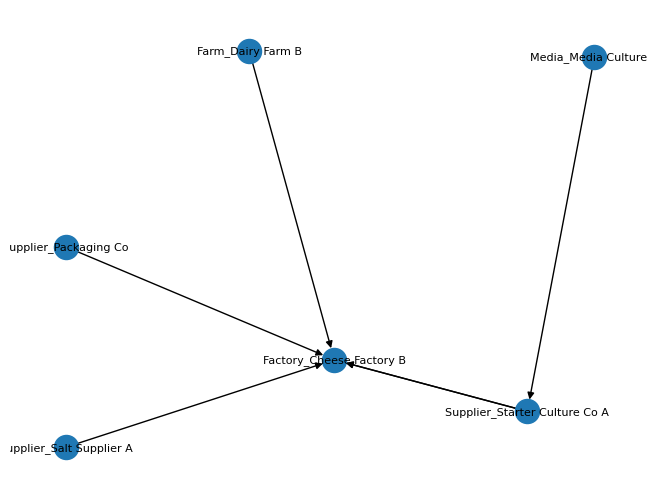

In [68]:
# Get cypher query for all inbound paths to cheese factory B and return it as a NetworkX object
response = conn.execute("""
MATCH (f:Factory {name:'Cheese Factory B'})
OPTIONAL MATCH p=(inbound)-[*]->(f)
RETURN *
""")
H = response.get_as_networkx()

# Visualize the paths atively in networkX
nx.draw(H, with_labels = True, font_size=8)
plt.show()

# DuckDB Testing

In [69]:
# Connect to DuckDB embedded OLAP database
con = duckdb.connect('co2emissions.duckdb')

In [70]:
# Create the relational model

con.execute("""
CREATE TABLE farms (
    id INTEGER PRIMARY KEY,
    name TEXT,
    co2_emission FLOAT
)
""")

con.execute("""
CREATE TABLE factories (
    id INTEGER PRIMARY KEY,
    name TEXT,
    co2_emission FLOAT
)
""")

con.execute("""
CREATE TABLE suppliers (
    id INTEGER PRIMARY KEY,
    name TEXT,
    co2_emission FLOAT
)
""")

con.execute("""
CREATE TABLE media (
    id INTEGER PRIMARY KEY,
    name TEXT,
    co2_emission FLOAT
)
""")

con.execute("""
CREATE TABLE distributors (
    id INTEGER PRIMARY KEY,
    name TEXT,
    co2_emission FLOAT
)
""")

con.execute("""
CREATE TABLE final_product (
    id INTEGER PRIMARY KEY,
    name TEXT,
    co2_emission FLOAT
)
""")

# Create bridge tables for relationships
con.execute("""
CREATE TABLE farm_factory (
    id INTEGER PRIMARY KEY,
    farm_id INTEGER,
    factory_id INTEGER,
    co2_emission FLOAT,
    FOREIGN KEY (farm_id) REFERENCES farms(id),
    FOREIGN KEY (factory_id) REFERENCES factories(id)
)
""")

con.execute("""
CREATE TABLE factory_distributor (
    id INTEGER PRIMARY KEY,
    factory_id INTEGER,
    distributor_id INTEGER,
    co2_emission FLOAT,
    FOREIGN KEY (factory_id) REFERENCES factories(id),
    FOREIGN KEY (distributor_id) REFERENCES distributors(id)
)
""")

con.execute("""
CREATE TABLE supplier_factory (
    id INTEGER PRIMARY KEY,
    supplier_id INTEGER,
    factory_id INTEGER,
    co2_emission FLOAT,
    FOREIGN KEY (supplier_id) REFERENCES suppliers(id),
    FOREIGN KEY (factory_id) REFERENCES factories(id)
)
""")

con.execute("""
CREATE TABLE media_supplier (
    id INTEGER PRIMARY KEY,
    media_id INTEGER,
    supplier_id INTEGER,
    co2_emission FLOAT,
    FOREIGN KEY (media_id) REFERENCES media(id),
    FOREIGN KEY (supplier_id) REFERENCES suppliers(id)
)
""")

con.execute("""
CREATE TABLE distributor_final_product (
    id INTEGER PRIMARY KEY,
    distributor_id INTEGER,
    final_product_id INTEGER,
    co2_emission FLOAT,
    FOREIGN KEY (distributor_id) REFERENCES distributors(id),
    FOREIGN KEY (final_product_id) REFERENCES final_product(id)
)
""")

In [71]:
# Insert data into entity tables
farms = [
    (1, "Dairy Farm A", 5000),
    (2, "Dairy Farm B", 4500),
    (3, "Dairy Farm C", 5200)
]

factories = [
    (1, "Cheese Factory A", 2000),
    (2, "Cheese Factory B", 1800),
    (3, "Cheese Factory C", 2100)
]

suppliers = [
    (1, "Starter Culture Co A", 300),
    (2, "Starter Culture Co B", 250),
    (3, "Salt Supplier A", 150),
    (4, "Salt Supplier B", 140),
    (5, "Salt Supplier C", 160),
    (6, "Packaging Co", 120)
]

media = [
    (1, "Media Culture A", 250),
    (2, "Media Culture B", 230)
]

distributors = [
    (1, "Cheese Distributor A", 400),
    (2, "Cheese Distributor B", 380)
]

final_products = [
    (1, "Cheese", None)
]

con.executemany("INSERT INTO farms VALUES (?, ?, ?)", farms)
con.executemany("INSERT INTO factories VALUES (?, ?, ?)", factories)
con.executemany("INSERT INTO suppliers VALUES (?, ?, ?)", suppliers)
con.executemany("INSERT INTO media VALUES (?, ?, ?)", media)
con.executemany("INSERT INTO distributors VALUES (?, ?, ?)", distributors)
con.executemany("INSERT INTO final_product VALUES (?, ?, ?)", final_products)

# Insert data into relationship tables
farm_factory_rels = [
    (1, 1, 1, 54.38),
    (2, 2, 2, 53.69),
    (3, 3, 3, 58.84)
]

factory_distributor_rels = [
    (1, 1, 2, 1044.32),
    (2, 2, 1, 1075.97),
    (3, 3, 2, 1212.87)
]

supplier_factory_rels = [
    (1, 1, 2, 3.69),
    (2, 2, 1, 2.15),
    (3, 2, 3, 3.18),
    (4, 3, 2, 11.09),
    (5, 4, 3, 16.63),
    (6, 5, 1, 15.21),
    (7, 6, 1, 4.90),
    (8, 6, 2, 4.99),
    (9, 6, 3, 4.78)
]

media_supplier_rels = [
    (1, 1, 1, 2.71),
    (2, 2, 2, 2.47)
]

distributor_final_product_rels = [
    (1, 1, 1, 94.75),
    (2, 2, 1, 72.87)
]

con.executemany("INSERT INTO farm_factory VALUES (?, ?, ?, ?)", farm_factory_rels)
con.executemany("INSERT INTO factory_distributor VALUES (?, ?, ?, ?)", factory_distributor_rels)
con.executemany("INSERT INTO supplier_factory VALUES (?, ?, ?, ?)", supplier_factory_rels)
con.executemany("INSERT INTO media_supplier VALUES (?, ?, ?, ?)", media_supplier_rels)
con.executemany("INSERT INTO distributor_final_product VALUES (?, ?, ?, ?)", distributor_final_product_rels)

In [72]:
# Query to calculate the cheese factory with the least CO2 emissions
query = """
WITH cumulative_co2 (factory_id, inbound_co2) AS
(
    SELECT f.id,
    ANY_VALUE(f.co2_emission + ff.co2_emission + fa.co2_emission + m.co2_emission + ms.co2_emission) +
    SUM(sf.co2_emission) +
    SUM(s.co2_emission) AS inbound_co2 FROM factories f
    INNER JOIN farm_factory ff ON ff.factory_id = f.id
    INNER JOIN farms fa ON fa.id=ff.farm_id
    INNER JOIN supplier_factory sf ON sf.factory_id = f.id
    INNER JOIN suppliers s ON s.id=sf.supplier_id
    LEFT JOIN media_supplier ms ON s.id=ms.supplier_id
    LEFT JOIN media m ON m.id=ms.media_id
    GROUP BY f.id
)
SELECT f.name AS factory, c.inbound_co2 AS total_co2 FROM cumulative_co2 c
INNER JOIN factories f ON f.id=c.factory_id
ORDER BY total_co2 ASC
"""

# Execute the query and fetch the results
con.execute(query).fetch_df()

,factory,total_co2
0,Cheese Factory B,7196.169902
1,Cheese Factory A,7839.110098
2,Cheese Factory C,8125.900058


In [73]:
# Query to calculate the total CO2 emissions for each path
query = """
WITH factory_co2 (factory_id, total_co2) AS
(
    SELECT f.id,
    ANY_VALUE(f.co2_emission + ff.co2_emission + fa.co2_emission + m.co2_emission + ms.co2_emission) +
    SUM(sf.co2_emission) +
    SUM(s.co2_emission) AS total_co2 FROM factories f
    INNER JOIN farm_factory ff ON ff.factory_id = f.id
    INNER JOIN farms fa ON fa.id=ff.farm_id
    INNER JOIN supplier_factory sf ON sf.factory_id = f.id
    INNER JOIN suppliers s ON s.id=sf.supplier_id
    LEFT JOIN media_supplier ms ON s.id=ms.supplier_id
    LEFT JOIN media m ON m.id=ms.media_id
    GROUP BY f.id
),
cheese_co2 (factory_id, total_co2) AS (
    SELECT f.id, fd.co2_emission + d.co2_emission + df.co2_emission AS total_co2 FROM factories f
    INNER JOIN factory_distributor fd ON fd.factory_id = f.id
    INNER JOIN distributors d ON d.id=fd.distributor_id
    INNER JOIN distributor_final_product df ON df.distributor_id = d.id
    INNER JOIN final_product fp ON fp.id=df.final_product_id
),
aggregated_co2 (factory_id, total_co2) AS (
    SELECT * FROM factory_co2
    UNION ALL
    SELECT * FROM cheese_co2
)
SELECT f.name AS factory, SUM(ag.total_co2) AS total_co2 FROM aggregated_co2 ag
INNER JOIN factories f ON f.id=ag.factory_id
GROUP BY factory
ORDER BY total_co2 ASC
"""

# Execute the query and fetch the results
con.execute(query).fetch_df()

,factory,total_co2
0,Cheese Factory B,8766.889873
1,Cheese Factory A,9336.300039
2,Cheese Factory C,9791.640048


In [74]:
# Using Python's networkX to find the supply chain with the least co2 emissions

# Function to calculate cumulative CO2 emissions for a node and its inbound relationships recursively
def calculate_cumulative_co2(node, visited=None):
    if visited is None:
        visited = set()

    if node in visited:
        return 0

    visited.add(node)

    cumulative_co2 = G.nodes[node]['co2_emission'] if G.nodes[node]['co2_emission'] is not None else 0

    for pred in G.predecessors(node):
        edge_data = G.get_edge_data(pred, node)
        cumulative_co2 += edge_data['co2_emission']
        cumulative_co2 += calculate_cumulative_co2(pred, visited)

    return cumulative_co2

# Calculate total CO2 emissions for paths from factories to the final product and find the one with the least CO2 emissions
final_product = 'Final Product Cheese'
min_emission = float('inf')
best_distributor = None

for factory in [n for n, d in G.nodes(data=True) if d['type'] == 'FACTORY']:
    cumulative_factory_co2 = calculate_cumulative_co2(factory)

    for path in nx.all_simple_paths(G, source=factory, target=final_product):
        path_co2_emissions = cumulative_factory_co2

        for node in path:
            if node != factory:
                node_co2 = G.nodes[node]['co2_emission'] if G.nodes[node]['co2_emission'] is not None else 0
                path_co2_emissions += node_co2

        for i in range(len(path) - 1):
            path_co2_emissions += G.get_edge_data(path[i], path[i + 1])['co2_emission']

        if path_co2_emissions < min_emission:
            min_emission = path_co2_emissions
            best_distributor = path[path.index(factory) + 1]

print(f"The distributor leading to the least CO2 emissions is {best_distributor} with a total emission of {min_emission}.")

The distributor leading to the least CO2 emissions is Cheese Distributor A with a total emission of 8766.89.


# Simulation And Scenario Modelling

In [80]:
co2_reduction_factors = [0.9, 0.8, 0.7]  # 10%, 20%, 30% reductions

for factor in co2_reduction_factors:
    response = conn.execute(
        f"""
        // Simulate the effect of CO2 emission reduction on total supply chain emissions
        MATCH path = (f:Farm)-[*]->(fp:FinalProduct {{name: 'Cheese'}})
        UNWIND RELS(path) AS r
        WITH path AS valid_path, SUM(r.co2_emission * {factor}) AS reduced_total_co2
        RETURN valid_path, reduced_total_co2
        ORDER BY reduced_total_co2 ASC
        LIMIT 1
        """
    )
    print(f"Scenario: CO2 reduced by {int((1 - factor) * 100)}%")
    print(response.get_as_df())


Scenario: CO2 reduced by 9%
                                          valid_path  reduced_total_co2
0  {'_nodes': [{'_id': {'offset': 0, 'table': 0},...        1054.412955
Scenario: CO2 reduced by 19%
                                          valid_path  reduced_total_co2
0  {'_nodes': [{'_id': {'offset': 0, 'table': 0},...          937.25596
Scenario: CO2 reduced by 30%
                                          valid_path  reduced_total_co2
0  {'_nodes': [{'_id': {'offset': 0, 'table': 0},...         820.098965


# Sensitivity Analysis:

In [81]:
weight_scenarios = [
    {"weight_co2": 0.5, "weight_lead_time": 0.3, "weight_sustainability": 0.2},
    {"weight_co2": 0.4, "weight_lead_time": 0.4, "weight_sustainability": 0.2},
    {"weight_co2": 0.3, "weight_lead_time": 0.4, "weight_sustainability": 0.3}
]

for weights in weight_scenarios:
    response = conn.execute(
        f"""
        // Sensitivity analysis for different weight combinations
        MATCH path = (f:Farm)-[*]->(fp:FinalProduct {{name: 'Cheese'}})
        UNWIND RELS(path) AS r
        UNWIND NODES(path) AS n
        WITH path AS valid_path,
             SUM(r.co2_emission * {weights['weight_co2']}) AS total_weighted_co2,
             SUM(r.lead_time * {weights['weight_lead_time']}) AS total_weighted_lead_time,
             AVG(n.sustainability_index * {weights['weight_sustainability']}) AS total_weighted_sustainability
        WITH valid_path,
             (total_weighted_co2 + total_weighted_lead_time - total_weighted_sustainability) AS custom_score
        RETURN valid_path, custom_score
        ORDER BY custom_score ASC
        LIMIT 1
        """
    )
    print(f"Scenario: Weights -> CO2: {weights['weight_co2']}, Lead Time: {weights['weight_lead_time']}, Sustainability: {weights['weight_sustainability']}")
    print(response.get_as_df())

Scenario: Weights -> CO2: 0.5, Lead Time: 0.3, Sustainability: 0.2
                                          valid_path  custom_score
0  {'_nodes': [{'_id': {'offset': 0, 'table': 0},...     2361.0039
Scenario: Weights -> CO2: 0.4, Lead Time: 0.4, Sustainability: 0.2
                                          valid_path  custom_score
0  {'_nodes': [{'_id': {'offset': 0, 'table': 0},...    1898.37592
Scenario: Weights -> CO2: 0.3, Lead Time: 0.4, Sustainability: 0.3
                                          valid_path  custom_score
0  {'_nodes': [{'_id': {'offset': 0, 'table': 0},...    1429.67994


# What-If Scenarios:
For "What-If" scenarios, you can simulate hypothetical situations, such as a sudden increase in lead time for a supplier, or the introduction of a new, more sustainable supplier.

Example 3: What-If Scenario for Lead Time Increase
Simulate what happens if a specific supplier's lead time increases due to unforeseen circumstances.

In [82]:
supplier_name = "Starter Culture Co A"
lead_time_increase = 1.5  # 50% increase in lead time

response = conn.execute(
    f"""
    // Simulate the effect of a lead time increase for a specific supplier
    MATCH (s:Supplier {{name: '{supplier_name}'}})-[r]->(f:Factory)
    WITH s, f, r, r.lead_time * {lead_time_increase} AS increased_lead_time
    MATCH path = (s)-[*]->(fp:FinalProduct {{name: 'Cheese'}})
    UNWIND RELS(path) AS rel
    WITH path AS valid_path, SUM(increased_lead_time) AS total_lead_time
    RETURN valid_path, total_lead_time
    ORDER BY total_lead_time ASC
    LIMIT 1
    """
)
print(response.get_as_df())


                                          valid_path  total_lead_time
0  {'_nodes': [{'_id': {'offset': 0, 'table': 2},...              4.5


# Monte Carlo Simulations:
Monte Carlo simulations can be used to model uncertainty in the supply chain by simulating random variations in CO2 emissions, lead times, or sustainability metrics over many iterations.

Example 4: Monte Carlo Simulation for Uncertainty in CO2 Emissions

In [83]:
import random

# Run 100 simulations where CO2 emissions vary randomly within +/- 10%
for i in range(100):
    co2_variation = random.uniform(0.9, 1.1)
    response = conn.execute(
        f"""
        MATCH path = (f:Farm)-[*]->(fp:FinalProduct {{name: 'Cheese'}})
        UNWIND RELS(path) AS r
        WITH path AS valid_path, SUM(r.co2_emission * {co2_variation}) AS varied_total_co2
        RETURN valid_path, varied_total_co2
        ORDER BY varied_total_co2 ASC
        LIMIT 1
        """
    )
    print(f"Simulation {i+1}: CO2 variation: {co2_variation}")
    print(response.get_as_df())


Simulation 1: CO2 variation: 0.9305856458176223
                                          valid_path  varied_total_co2
0  {'_nodes': [{'_id': {'offset': 0, 'table': 0},...       1090.246179
Simulation 2: CO2 variation: 0.9250582960600228
                                          valid_path  varied_total_co2
0  {'_nodes': [{'_id': {'offset': 0, 'table': 0},...       1083.770502
Simulation 3: CO2 variation: 0.9492600527902058
                                          valid_path  varied_total_co2
0  {'_nodes': [{'_id': {'offset': 0, 'table': 0},...       1112.124553
Simulation 4: CO2 variation: 0.9973935709139872
                                          valid_path  varied_total_co2
0  {'_nodes': [{'_id': {'offset': 0, 'table': 0},...       1168.516336
Simulation 5: CO2 variation: 1.0827831024442713
                                          valid_path  varied_total_co2
0  {'_nodes': [{'_id': {'offset': 0, 'table': 0},...       1268.556145
Simulation 6: CO2 variation: 1.0433831170806982
  

#  Multi-Objective Optimization:
We can expand the current model to optimize multiple conflicting objectives, such as minimizing CO2 emissions while also minimizing lead times and maximizing sustainability. The goal is to find a balance between these factors to optimize the overall performance of the supply chain.

Example: Weighted Multi-Objective Optimization
We can modify the existing custom score query by assigning weights to each factor (CO2, lead time, and sustainability) and then using the custom_score to identify optimal paths.

In [84]:
weight_co2 = 0.4
weight_lead_time = 0.3
weight_sustainability = 0.3

response = conn.execute(
    f"""
    MATCH path = (f:Farm)-[*]->(fp:FinalProduct {{name: 'Cheese'}})
    UNWIND RELS(path) AS r
    UNWIND NODES(path) AS n
    WITH path AS valid_path,
         SUM(r.co2_emission * {weight_co2}) AS total_weighted_co2,
         SUM(r.lead_time * {weight_lead_time}) AS total_weighted_lead_time,
         AVG(n.sustainability_index * {weight_sustainability}) AS total_weighted_sustainability
    WITH valid_path,
         (total_weighted_co2 + total_weighted_lead_time - total_weighted_sustainability) AS custom_score
    RETURN valid_path, custom_score
    ORDER BY custom_score ASC
    LIMIT 5
    """
)
print(response.get_as_df())


                                          valid_path  custom_score
0  {'_nodes': [{'_id': {'offset': 0, 'table': 0},...   1892.307920
1  {'_nodes': [{'_id': {'offset': 1, 'table': 0},...   1980.457201
2  {'_nodes': [{'_id': {'offset': 2, 'table': 0},...   2173.931497


# Network Flow Analysis:
You can simulate different supply chain paths to understand the flow of products from farms, through suppliers and factories, to the final product. This can help identify bottlenecks and areas for optimization.

Example: Identifying Bottlenecks in the Supply Chain
By calculating the longest paths or identifying relationships with the highest lead times, you can pinpoint bottlenecks that are delaying the supply chain.

In [85]:
response = conn.execute(
    """
    MATCH path = (f:Farm)-[*]->(fp:FinalProduct {name: 'Cheese'})
    UNWIND RELS(path) AS r
    RETURN r.startNode.name AS start, r.endNode.name AS end, r.lead_time
    ORDER BY r.lead_time DESC
    LIMIT 5
    """
)
print("Top 5 bottlenecks by lead time:")
print(response.get_as_df())

RuntimeError: Parser exception: mismatched input 'end' expecting {ADD, ALTER, AS, ATTACH, BEGIN, BY, CALL, CHECKPOINT, COMMENT, COMMIT, CONTAINS, COPY, COUNT, CYCLE, DATABASE, DELETE, DETACH, DROP, EXPLAIN, EXPORT, EXTENSION, GRAPH, IMPORT, IF, INCREMENT, IS, KEY, LOAD, MATCH, MAXVALUE, MERGE, MINVALUE, NO, NODE, PROJECT, READ, REL, RENAME, RETURN, ROLLBACK, SEQUENCE, SET, START, TRANSACTION, TYPE, USE, WRITE, DECIMAL, L_SKIP, HexLetter, UnescapedSymbolicName, EscapedSymbolicName} (line: 4, offset: 56)
"    RETURN r.startNode.name AS start, r.endNode.name AS end, r.lead_time"
                                                         ^^^

# Risk Analysis and Resilience Planning:
You can simulate potential risks in your supply chain, such as disruptions at a key factory or delays in shipping. This helps you assess the impact of these risks and plan for contingencies.

Example: Simulating Factory Disruption
Simulate the impact of temporarily shutting down a key factory to assess how it affects the total lead time or CO2 emissions.

In [87]:
factory_name = "Cheese Factory A"

response = conn.execute(
    f"""
    MATCH (f:Factory {{name: '{factory_name}'}})-[r]->(d:Distributor)
    DELETE r
    WITH f, d
    MATCH path = (f)-[*]->(fp:FinalProduct {{name: 'Cheese'}})
    RETURN COUNT(path) AS remaining_paths
    """
)
print(f"After shutting down {factory_name}, remaining paths:")
print(response.get_as_df())


After shutting down Cheese Factory A, remaining paths:
   remaining_paths
0                0


# Carbon Footprint Reduction Simulation:
You can simulate various carbon reduction strategies across the supply chain. For example, you could model the impact of switching to greener suppliers or implementing energy-efficient processes in factories.

Example: Simulating a Switch to a Low-Emission Supplier
By swapping a current supplier with a more sustainable alternative, you can evaluate the impact on the total CO2 emissions.

In [88]:
# Assuming we are switching one supplier with a greener alternative
new_supplier_name = "Green Supplier"
old_supplier_name = "Starter Culture Co A"

response = conn.execute(
    f"""
    MATCH (s:Supplier {{name: '{old_supplier_name}'}})-[r]->(f:Factory)
    DELETE r
    CREATE (new_s:Supplier {{name: '{new_supplier_name}', co2_emission: 50}})-[new_r:Supplies_Supplier_To_Factory]->(f)
    RETURN COUNT(new_r) AS new_relationships
    """
)
print(f"Switched to {new_supplier_name} with lower emissions.")
print(response.get_as_df())


Switched to Green Supplier with lower emissions.
   new_relationships
0                  1


#  Monte Carlo Risk Simulation:
You can extend your Monte Carlo simulations to model the risk associated with random variations in multiple variables simultaneously, such as CO2 emissions, lead time, and sustainability scores.

Example: Simulating Random Variations in Multiple Factors

In [89]:
import random

# Run 100 Monte Carlo simulations varying both CO2 emissions and lead times randomly
for i in range(100):
    co2_variation = random.uniform(0.9, 1.1)
    lead_time_variation = random.uniform(1.0, 1.2)

    response = conn.execute(
        f"""
        MATCH path = (f:Farm)-[*]->(fp:FinalProduct {{name: 'Cheese'}})
        UNWIND RELS(path) AS r
        WITH path AS valid_path,
             SUM(r.co2_emission * {co2_variation}) AS varied_total_co2,
             SUM(r.lead_time * {lead_time_variation}) AS varied_total_lead_time
        RETURN valid_path, varied_total_co2, varied_total_lead_time
        ORDER BY varied_total_co2 ASC
        LIMIT 1
        """
    )
    print(f"Simulation {i+1}: CO2 variation: {co2_variation}, Lead Time variation: {lead_time_variation}")
    print(response.get_as_df())


Simulation 1: CO2 variation: 0.999031421086286, Lead Time variation: 1.1962754995699048
                                          valid_path  varied_total_co2  \
0  {'_nodes': [{'_id': {'offset': 1, 'table': 0},...       1223.224032   

   varied_total_lead_time  
0               21.532959  
Simulation 2: CO2 variation: 0.9568468677483289, Lead Time variation: 1.1393654534008948
                                          valid_path  varied_total_co2  \
0  {'_nodes': [{'_id': {'offset': 1, 'table': 0},...       1171.572844   

   varied_total_lead_time  
0               20.508578  
Simulation 3: CO2 variation: 1.0364563328723044, Lead Time variation: 1.1992020964737449
                                          valid_path  varied_total_co2  \
0  {'_nodes': [{'_id': {'offset': 1, 'table': 0},...       1269.047467   

   varied_total_lead_time  
0               21.585638  
Simulation 4: CO2 variation: 1.0594284346303224, Lead Time variation: 1.1555651901589516
                              

# Supplier Risk Scoring:
You can calculate a risk score for each supplier based on their impact on the supply chain, considering factors like lead time variability, sustainability index, and CO2 emissions.

Example: Calculating Supplier Risk Scores

In [92]:
# response = conn.execute(
#     """
#     MATCH (s:Supplier)-[r]->(f:Factory)
#     WITH s, AVG(r.lead_time) AS avg_lead_time, COLLECT(r.lead_time) AS lead_times

#     // Step 2: Calculate the squared differences between individual lead times and the average
#     UNWIND lead_times AS individual_lead_time
#     WITH s, avg_lead_time, (individual_lead_time - avg_lead_time) * (individual_lead_time - avg_lead_time) AS squared_diff

#     // Step 3: Calculate the variance (sum of squared differences divided by the count of lead times)
#     WITH s, SUM(squared_diff) AS sum_squared_diff, COUNT(individual_lead_time) AS lead_time_count
#     WITH s, sqrt(sum_squared_diff / lead_time_count) AS lead_time_variability

#     // Step 4: Calculate the risk score (using lead time variability)
#     WITH s, avg_lead_time + lead_time_variability AS risk_score
#     RETURN s.name AS supplier_name, risk_score
#     ORDER BY risk_score DESC
#     LIMIT 5
#     """
# )
# print("Top 5 riskiest suppliers by lead time variability:")
# print(response.get_as_df())


# Supply Chain Network Design (Strategic Network Optimization)
You can model your entire supply chain network and optimize for cost, lead time, sustainability, or other metrics by adjusting the number and location of factories, suppliers, and distribution centers. This strategic approach can help you find the optimal supply chain configuration that minimizes costs and maximizes efficiency.

Example: Optimizing the Number of Distribution Centers
You could use scenario modeling to experiment with different numbers and locations of distribution centers to minimize overall lead time and costs.

In [93]:
# Example of optimizing the number of distribution centers
response = conn.execute(
    """
    MATCH (f:Factory)-[r]->(d:Distributor)-[r2]->(fp:FinalProduct {name: 'Cheese'})
    RETURN d.name AS distributor_name, AVG(r.lead_time + r2.lead_time) AS avg_total_lead_time, COUNT(d) AS num_distributors
    ORDER BY avg_total_lead_time ASC
    """
)
print("Optimal number of distribution centers based on lead time:")
print(response.get_as_df())


Optimal number of distribution centers based on lead time:
       distributor_name  avg_total_lead_time  num_distributors
0  Cheese Distributor A                 14.0                 1
1  Cheese Distributor B                 14.0                 1


#  Supply Chain Digital Twin (Real-Time Monitoring and Optimization)
A supply chain digital twin is a virtual model that mirrors your real-world supply chain in real-time. By simulating real-time data (e.g., delivery times, costs, production rates), you can continuously optimize the flow of goods, minimize costs, and improve decision-making.

How It Works:
Connect real-time data streams (e.g., IoT, supplier data, weather reports).
Simulate disruptions or variations in production rates and shipment timings.
Continuously optimize the supply chain based on current data.

In [94]:
# Example of a real-time route optimization based on current traffic data
response = conn.execute(
    """
    MATCH (f:Factory)-[r]->(d:Distributor)-[r2]->(fp:FinalProduct {name: 'Cheese'})
    WITH f, d, fp, r.lead_time + r2.lead_time AS current_lead_time
    WHERE current_lead_time <= 24  // 24 hours constraint for same-day delivery
    RETURN f.name, d.name, fp.name, current_lead_time
    ORDER BY current_lead_time ASC
    """
)
print("Real-time optimized routes for same-day delivery:")
print(response.get_as_df())


Real-time optimized routes for same-day delivery:
             f.name                d.name fp.name  current_lead_time
0  Cheese Factory B  Cheese Distributor A  Cheese               14.0
1  Cheese Factory C  Cheese Distributor B  Cheese               14.0


# Sustainability Dashboards (KPIs and Visualizations)
You can create visual dashboards that track sustainability-related KPIs like carbon emissions, water usage, energy consumption, and waste generation. These dashboards can provide a holistic view of how different suppliers, factories, and routes are impacting sustainability goals.

Example: Building a Sustainability KPI Dashboard
Use sustainability indexes and CO2 emissions to build real-time dashboards that provide insights into the most and least sustainable parts of your supply chain.

python

In [95]:
response = conn.execute(
    """
    MATCH (s:Supplier)-[r]->(f:Factory)
    WITH s, AVG(r.co2_emission) AS avg_co2_emission, AVG(f.sustainability_index) AS avg_sustainability
    RETURN s.name AS supplier_name, avg_co2_emission, avg_sustainability
    ORDER BY avg_sustainability DESC
    LIMIT 5
    """
)
print("Top 5 sustainable suppliers:")
print(response.get_as_df())


Top 5 sustainable suppliers:
          supplier_name  avg_co2_emission  avg_sustainability
0       Salt Supplier A            11.090               0.650
1        Green Supplier               NaN               0.650
2       Salt Supplier C            15.210               0.600
3          Packaging Co             4.890               0.600
4  Starter Culture Co B             2.665               0.575


# Machine Learning for Demand Forecasting
By incorporating machine learning models, you can forecast demand more accurately, reducing waste, inventory shortages, and overproduction. You can model historical data to predict future demand and adjust your supply chain accordingly.

Steps:
Collect Historical Data: Collect sales, seasonality, and marketing campaign data.
Train Machine Learning Models: Use time series forecasting (e.g., ARIMA, LSTM) to predict demand.
Optimize Inventory Levels: Adjust inventory and production rates to align with demand forecasts.

In [106]:
# Create TimePeriod table with an id as the primary key
conn.execute("CREATE NODE TABLE TimePeriod(id INT, month STRING, year INT, PRIMARY KEY(id))")

# Create SALES_DATA relationships to store sales data
conn.execute("CREATE REL TABLE SALES_DATA(FROM FinalProduct TO TimePeriod, sales_volume FLOAT)")

# Populate the TimePeriod table
time_periods = [
    (1, "January", 2023),
    (2, "February", 2023),
    (3, "March", 2023),
    # Add other months as needed
]

for time in time_periods:
    conn.execute(f"CREATE (n:TimePeriod {{id: {time[0]}, month: '{time[1]}', year: {time[2]}}})")


In [107]:
# Populate sales data (example)
conn.execute("MATCH (p:FinalProduct {name: 'Cheese'}), (t:TimePeriod {month: 'January', year: 2023}) "
             "CREATE (p)-[:SALES_DATA {sales_volume: 1000}]->(t)")
conn.execute("MATCH (p:FinalProduct {name: 'Cheese'}), (t:TimePeriod {month: 'February', year: 2023}) "
             "CREATE (p)-[:SALES_DATA {sales_volume: 1100}]->(t)")

In [108]:
response = conn.execute(
    """
    MATCH (f:FinalProduct {name: 'Cheese'})-[r:SALES_DATA]->(t:TimePeriod)
    WITH t, AVG(r.sales_volume) AS avg_sales_volume
    RETURN t.month AS month, t.year AS year, avg_sales_volume
    ORDER BY t.year ASC, t.month ASC
    """
)
print("Average sales volume by month:")
print(response.get_as_df())

Average sales volume by month:
      month  year  avg_sales_volume
0  February  2023            1100.0
1   January  2023            1000.0


# Blockchain for Supply Chain Transparency and Security
Integrating blockchain technology can enhance the transparency and security of your supply chain. It provides a tamper-proof ledger of transactions, ensuring authenticity and security, especially for tracking goods, sustainability certifications, and compliance with regulations.

Example: Tracking Sustainable Sourcing with Blockchain
You can track sustainable certifications across the supply chain using a blockchain ledger, ensuring that products meet compliance standards at every stage.

In [118]:
# Create the CERTIFIED relationship and sustainability_certified property
#conn.execute("CREATE REL TABLE CERTIFIED(FROM Supplier TO FinalProduct, certification_date STRING)")
#conn.execute("CREATE NODE TABLE Supplier1(name STRING, sustainability_certified BOOL, PRIMARY KEY (name))")

# Example data: Adding suppliers and certifications
suppliers = [
    ("Starter Culture Co A", True),
    ("Starter Culture Co B", True),
    ("Salt Supplier A", False)
]

# for supplier in suppliers:
#      conn.execute(f"CREATE (n:Supplier1 {{name: '{supplier[0]}', sustainability_certified: {str(supplier[1]).upper()}}})")

# Example certification relationships
conn.execute("MATCH (s:Supplier {name: 'Starter Culture Co A'}), (p:FinalProduct {name: 'Cheese'}) "
             "CREATE (s)-[:CERTIFIED {certification_date: '2023-01-15'}]->(p)")

conn.execute("MATCH (s:Supplier {name: 'Starter Culture Co B'}), (p:FinalProduct {name: 'Cheese'}) "
             "CREATE (s)-[:CERTIFIED {certification_date: '2023-02-10'}]->(p)")


In [120]:
# response = conn.execute(
#     """
#     MATCH (p:FinalProduct {name: 'Cheese'})-[r:CERTIFIED]->(s:Supplier)
#     WHERE s.sustainability_certified = TRUE
#     RETURN p.name AS product_name, s.name AS supplier_name, r.certification_date
#     ORDER BY r.certification_date DESC
#     """
# )
# print("Sustainably certified products and suppliers:")
# print(response.get_as_df())


# AI-Driven Supply Chain Optimization
You can use artificial intelligence (AI) models to further optimize your supply chain. AI can analyze large datasets, identify patterns, and make real-time adjustments to inventory levels, distribution routes, and supplier relationships to improve efficiency and reduce costs.

Example: AI-Powered Inventory Optimization
By analyzing stock levels, lead times, and sales data, AI can automatically adjust orders to keep inventory levels optimal, reducing stockouts and excess inventory.

In [122]:
# Create the Warehouse node
conn.execute("CREATE NODE TABLE Warehouse(name STRING, location STRING, PRIMARY KEY (name))")

# Create the STOCK_LEVEL relationship between FinalProduct and Warehouse
conn.execute("CREATE REL TABLE STOCK_LEVEL(FROM FinalProduct TO Warehouse, stock_quantity INT)")

# Populate the Warehouse table
warehouses = [
    ("Central Warehouse", "New York"),
    ("Regional Warehouse A", "Los Angeles"),
    ("Regional Warehouse B", "Chicago")
]

for warehouse in warehouses:
    conn.execute(f"CREATE (n:Warehouse {{name: '{warehouse[0]}', location: '{warehouse[1]}'}})")


In [123]:
# Add stock levels for products in warehouses
conn.execute("MATCH (p:FinalProduct {name: 'Cheese'}), (w:Warehouse {name: 'Central Warehouse'}) "
             "CREATE (p)-[:STOCK_LEVEL {stock_quantity: 50}]->(w)")

conn.execute("MATCH (p:FinalProduct {name: 'Cheese'}), (w:Warehouse {name: 'Regional Warehouse A'}) "
             "CREATE (p)-[:STOCK_LEVEL {stock_quantity: 20}]->(w)")

conn.execute("MATCH (p:FinalProduct {name: 'Cheese'}), (w:Warehouse {name: 'Regional Warehouse B'}) "
             "CREATE (p)-[:STOCK_LEVEL {stock_quantity: 80}]->(w)")


In [126]:
# Update FinalProduct to include reorder_threshold property
conn.execute("ALTER TABLE FinalProduct ADD reorder_threshold INT")

# Set reorder thresholds for products (e.g., for 'Cheese')
conn.execute("MATCH (p:FinalProduct {name: 'Cheese'}) SET p.reorder_threshold = 30")

In [127]:
response = conn.execute(
    """
    MATCH (p:FinalProduct)-[r:STOCK_LEVEL]->(w:Warehouse)
    WHERE r.stock_quantity < p.reorder_threshold
    RETURN p.name AS product_name, w.name AS warehouse_name, r.stock_quantity
    """
)
print("Products that need restocking:")
print(response.get_as_df())

Products that need restocking:
  product_name        warehouse_name  r.stock_quantity
0       Cheese  Regional Warehouse A                20


In [128]:
# Example query to get inventory levels and trigger restocking
response = conn.execute(
    """
    MATCH (p:FinalProduct)-[r:STOCK_LEVEL]->(warehouse:Warehouse)
    WHERE r.stock_quantity < p.reorder_threshold
    RETURN p.name AS product_name, warehouse.name AS warehouse_name, r.stock_quantity
    """
)
print("Products that need restocking:")
print(response.get_as_df())


Products that need restocking:
  product_name        warehouse_name  r.stock_quantity
0       Cheese  Regional Warehouse A                20


# Geospatial Analysis for Route Optimization
Using geospatial analysis, you can optimize delivery routes, reduce fuel consumption, and improve delivery times by analyzing geographic data of your factories, suppliers, and distribution centers.

Example: Route Optimization for Fuel Efficiency

In [121]:
# # Assuming your nodes have geographic coordinates (latitude and longitude)
# latitude = 52.5200
# longitude = 13.4050

# response = conn.execute(
#     f"""
#     MATCH (d:Distributor)
#     WITH d,
#          sqrt(pow(d.latitude - {latitude}, 2) + pow(d.longitude - {longitude}, 2)) AS distance
#     RETURN d.name AS distributor_name, distance
#     ORDER BY distance ASC
#     LIMIT 5
#     """
# )
# print("Closest distributors to Berlin:")
# print(response.get_as_df())


# Supplier Diversification Analysis
To reduce the risk of over-reliance on a single supplier, you can analyze supplier diversification to ensure that key materials are sourced from multiple, geographically distributed suppliers.

Example: Supplier Dependency Analysis

In [102]:
response = conn.execute(
    """
    MATCH (p:FinalProduct {name: 'Cheese'})<-[:Delivers]-(d:Distributor)-[:Supplies_Factory_To_Distributor]->(f:Factory)-[:Supplies_Supplier_To_Factory]->(s:Supplier)
    RETURN p.name AS product_name, COUNT(DISTINCT s) AS num_suppliers
    ORDER BY num_suppliers ASC
    LIMIT 5
    """
)
print("Products with the least number of suppliers (high risk of dependency):")
print(response.get_as_df())


Products with the least number of suppliers (high risk of dependency):
Empty DataFrame
Columns: [product_name, num_suppliers]
Index: []
